In [1]:
# Importing libraries and helpers
import numpy as np
from matplotlib import pyplot as plt
from helpers import *

In [2]:
# Number of nodes in graph
N = 15
COUNT_HELL = 2
COUNT_HEAVEN = 2

In [3]:
def plot_graph(Hell,Heaven,adj):
    
    # Create Graph
    n = len(adj)
    edges = []
    for u1 in range(n):
        for v1 in adj[u1]:
            if u1<v1:
                edges.append([u1,v1])   
    g = ig.Graph(n=n, edges=edges)
    
    # Formatting
    g.vs["label"] = [str(i) for i in range(n)]
    g.vs["color"] = ["yellow"] * n
    for u in Hell:
        g.vs[u]["color"] = "red"
        g.vs[u]["label"] = "-"
        
    for u in Heaven:
        g.vs[u]["color"] = "green"
        g.vs[u]["label"] = "+"
    
    # Display
    layout = g.layout("kk")
    fig, ax = plt.subplots()
    ig.plot(g, layout=layout, target=ax)
    plt.show()    

In [4]:
# Performing one run of hell heaven exp and report fail (0) or success(1)
def hell_heaven_exp(u, Hell, Heaven, adj):
    current = u
    while True:
        if current in Hell:
            return 0
        if current in Heaven:
            return 1
        current = take_step(current, adj)

In [5]:
# Return the calculated success probability via modelling as an electric graph
def get_calc_prob(u,Hell,Heaven,adj):
    
    n = len(adj)
    M = np.zeros([n,n])
    I = np.zeros([n,1])
    
    # Create M
    for i in range(n):
        M[i][i] = len(adj[i])
        for j in adj[i]:
            M[i][j] = -1
            
    # Hell
    for i in Hell:
        for j in range(n):
            M[i][j] = 0
        M[i][i] = 1
        I[i] = 0
    
    # Heaven
    for i in Heaven:
        for j in range(n):
            M[i][j] = 0
        M[i][i] = 1
        I[i] = 1
    
    # Solve
    V = np.linalg.inv(M) @ I
    return V[u]

Retrying Graph Generation since not connected


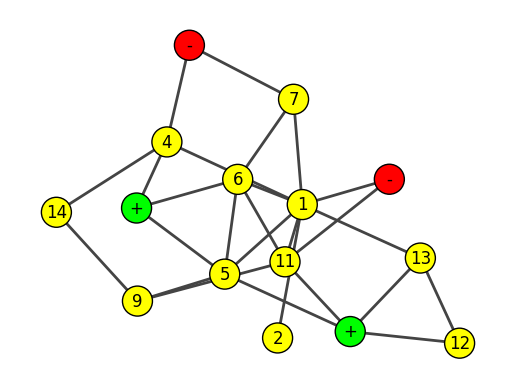

In [6]:
# Create Random Graph
adj = generate_graph(N)
while is_connected(adj)==False:
    adj = generate_graph(N)
    print("Retrying Graph Generation since not connected")

# Create Hell-Heaven Sets randomly
left = set([i for i in range(N)])
Hell = set()
Heaven = set()
for i in range(COUNT_HELL):
    u = np.random.choice(list(left))
    left.remove(u)
    Hell.add(u) 
for i in range(COUNT_HEAVEN):
    u = np.random.choice(list(left))
    left.remove(u)
    Heaven.add(u)

# Plot the graph
plot_graph(Hell,Heaven,adj)

In [7]:
# Perform the experiments and count number of success
REPEAT = 100000
count_success = [0] * N
for u in range(N):
    for exp in range(REPEAT):
        count_success[u] += hell_heaven_exp(u,Hell,Heaven,adj)

In [8]:
# Calculate the predicted success
predicted_success = [0] * N
for u in range(N):
    predicted_success[u] = int(get_calc_prob(u, Hell, Heaven, adj) * REPEAT)

In [9]:
# Compare
print("index","emperical","predicted","error%")
for u in range(N):
    if u not in Hell and u not in Heaven:
        if predicted_success[u]!=0:
            err = round((abs(count_success[u] - predicted_success[u])/predicted_success[u])*100,2)
        else:
            err = 0
        print(u, count_success[u], predicted_success[u],err,sep="\t")

index emperical predicted error%
1	53059	52994	0.12
2	52877	52994	0.22
4	52856	52800	0.11
5	76741	76320	0.55
6	64926	64993	0.1
7	39468	39329	0.35
9	63944	63616	0.52
11	56482	56320	0.29
12	90710	90598	0.12
13	81342	81197	0.18
14	58133	58208	0.13
